<a href="https://colab.research.google.com/github/valuedriven/dataanalysis/blob/master/trabalho_final/trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Passos requeridos para o trabalho:
- Abrir o conjunto de dados em um DataFrame, 
- Visualizar os dados por meio de gráficos construídos com uma das bibliotecas gráficas vistas na disciplina,
- Utilizar aprendizado de máquina não supervisionado e/ou supervisionado para construir um modelo que seja capaz de prever uma propriedade de interesse.

In [293]:
# Dataset disponível em https://www.openml.org/

dataset = 'credit-g'
from sklearn.datasets import fetch_openml
risk_dataset = fetch_openml(name=dataset,version='1')
print(risk_dataset.DESCR)

**Author**: Dr. Hans Hofmann  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) - 1994    
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)

**German Credit dataset**  
This dataset classifies people described by a set of attributes as good or bad credit risks.

This dataset comes with a cost matrix: 
``` 
Good  Bad (predicted)  
Good   0    1   (actual)  
Bad    5    0  
```

It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).  

### Attribute description  

1. Status of the existing checking account, in Deutsche Mark.  
2. Duration in months  
3. Credit history (credits taken, paid back duly, delays, critical accounts)  
4. Purpose of the credit (car, television,...)  
5. Credit amount  
6. Status of savings account/bonds, in Deutsche Mark.  
7. Present employment, in number of years.  
8. Installment rate in percentage of disposable income  
9. P

In [294]:
print(risk_dataset.data.shape)

(1000, 20)


In [295]:
import pandas as pd
df = pd.DataFrame(risk_dataset.data)
df.columns = risk_dataset.feature_names
df['risk'] = risk_dataset.target
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,risk
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [296]:
# Converter target para valores numéricos

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categories = risk_dataset.target.unique()
encoder.fit(categories)
target = encoder.transform(risk_dataset.target)
target

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [297]:
# Converter dados para valores numéricos

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data = encoder.fit_transform(risk_dataset.data)
data

array([[ 1.,  2.,  1., ...,  1.,  1.,  1.],
       [ 0., 29.,  3., ...,  0.,  1.,  0.],
       [ 3.,  8.,  1., ...,  0.,  1.,  1.],
       ...,
       [ 3.,  8.,  3., ...,  0.,  1.,  1.],
       [ 1., 27.,  3., ...,  1.,  1.,  0.],
       [ 0., 27.,  1., ...,  0.,  1.,  1.]])

In [298]:
# Normalizar dados

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data

array([[-0.46, -1.56, -1.15, ...,  1.21,  0.2 ,  0.65],
       [-1.26,  2.03,  0.73, ..., -0.82,  0.2 , -1.53],
       [ 1.13, -0.76, -1.15, ..., -0.82,  0.2 ,  0.65],
       ...,
       [ 1.13, -0.76,  0.73, ..., -0.82,  0.2 ,  0.65],
       [-0.46,  1.77,  0.73, ...,  1.21,  0.2 , -1.53],
       [-1.26,  1.77, -1.15, ..., -0.82,  0.2 ,  0.65]])

In [299]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

clf = KNeighborsClassifier()
parameters = {'n_neighbors':range(1,9)}
knn = GridSearchCV(clf,parameters,cv=30)
knn.fit(data,target)
print(knn.score(data,target))
print(knn.best_params_)

0.989
{'n_neighbors': 6}


In [300]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(data,target)
print(clf.score(data,target))
print(clf.predict_proba(data))

0.989
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [301]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)
X_train, X_test, y_train, y_test

(array([[ 1.13,  0.44, -0.21, ..., -0.82,  0.2 ,  0.65],
        [ 1.13,  2.03, -2.09, ..., -0.82,  0.2 ,  0.65],
        [ 1.13, -0.76, -1.15, ...,  1.21,  0.2 ,  0.65],
        ...,
        [ 1.13, -1.16,  0.73, ..., -0.82,  0.2 ,  0.65],
        [-1.26, -0.1 , -1.15, ..., -0.82,  0.2 , -1.53],
        [-1.26,  1.23, -0.21, ...,  1.21,  0.2 ,  0.65]]),
 array([[-0.46,  1.23,  0.73, ...,  1.21,  0.2 ,  0.65],
        [ 1.13, -1.16,  0.73, ..., -0.82, -5.1 ,  0.65],
        [ 1.13, -0.1 ,  0.73, ...,  1.21,  0.2 ,  0.65],
        ...,
        [ 1.13, -0.76, -1.15, ..., -0.82,  0.2 ,  0.65],
        [-1.26, -0.76,  0.73, ..., -0.82,  0.2 ,  0.65],
        [ 1.13, -1.56,  0.73, ..., -0.82,  0.2 ,  0.65]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [302]:
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [303]:
# Parâmetros gerais para ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

class_names = risk_dataset.target.unique()
color_map = plt.cm.Blues
options = [
    ("Confusion matrix, without normalization", None),
    ("Confusion matrix, normalized", "true"),
]

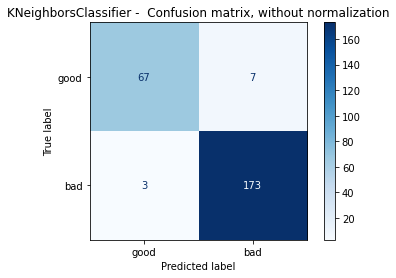

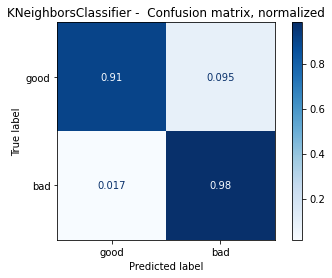

In [304]:
method = 'KNeighborsClassifier'
for title, normalize in options:
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names,normalize=normalize,cmap=color_map)
    disp.ax_.set_title(method+' -  '+title)
plt.show()

In [305]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(data,target)
print(lda.score(data,target))
print(lda.predict_proba(data))
print(lda.explained_variance_ratio_)


1.0
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]
[1.]


In [306]:
y_pred = lda.fit(X_train, y_train).predict(X_test)


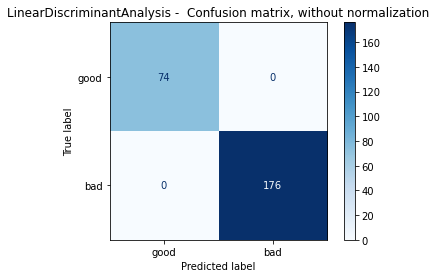

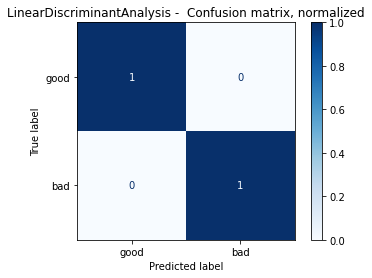

In [307]:
method = 'LinearDiscriminantAnalysis'
for title, normalize in options:
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names,normalize=normalize,cmap=color_map)
    disp.ax_.set_title(method+' -  '+title)
plt.show()

In [308]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(data,target)
print(qda.score(data,target))
print(qda.predict_proba(data))


1.0
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [309]:
y_pred = qda.fit(X_train, y_train).predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


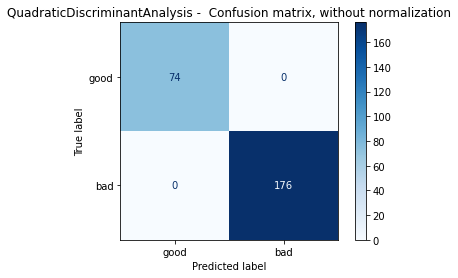

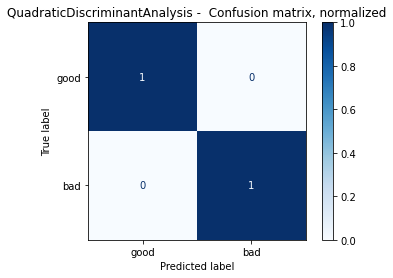

In [310]:
method = 'QuadraticDiscriminantAnalysis'
for title, normalize in options:
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names,normalize=normalize,cmap=color_map)
    disp.ax_.set_title(method+' -  '+title)
plt.show()

In [311]:
from sklearn.svm import SVC

svc = SVC(gamma="scale")
svc.fit(data,target)
print(svc.score(data,target))
print(svc.predict(data))

1.0
[1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1
 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0
 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0
 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0
 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 

In [312]:
y_pred = svc.fit(X_train, y_train).predict(X_test)

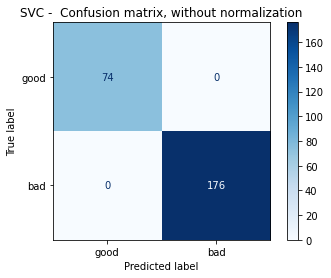

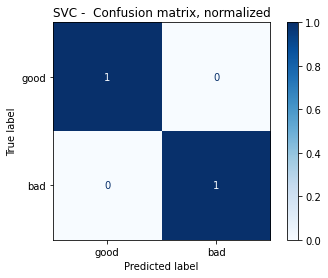

In [313]:
method = 'SVC'
for title, normalize in options:
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names,normalize=normalize,cmap=color_map)
    disp.ax_.set_title(method+' -  '+title)
plt.show()